In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'svg'
import mpltern
from matplotlib import rc
rc('text', usetex=True)
import seaborn as sns
import matplotlib.pyplot as plt

import pdb
import numpy as np

import sys
if '../' not in sys.path:
    sys.path.append('../')

from solvers.utils import makegrid3d, scatter3d, contours,plotlocus

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/projects/academic/olgawodo/kiranvad/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
grid = np.asarray(makegrid3d(num=40))

In [4]:
floryhuggins =[{'name': 'CHCl3/F8/PCBM','chi': [0.341,0.885,0.941]},
              {'name': 'chlorobenzene/PFB/PCBM','chi': [0.340,0.899,0.899]},
              {'name': 'CHCl3/APFO-3/PCBM','chi': [0.505,0.885,0.450]},
              {'name': 'chlorobenzene/APFO-3/PCBM','chi': [0.480,0.899,0.479]}, 
              {'name': 'xylene/PFB/PCBM','chi': [0.442,1.630,1.013]}
               ]
N = {'CHCl3':1,'chlorobenzene':1,'xylene':1,'F8':720,'PFB':73,'F8BT':172,'APFO-3':66,'PCBM':5}

In [5]:
"""
OW APS Physics Letters: https://lib.dr.iastate.edu/cgi/viewcontent.cgi?article=1231&context=me_pubs
B Zhou Page:65 
https://dspace.mit.edu/bitstream/handle/1721.1/35312/76904537-MIT.pdf?sequence=2&isAllowed=y
"""

dataload = 'ow'

if dataload is 'ow':
    M = np.array([5,1,5])
    chi = [0.5,1,0.5] # chi_12, chi_13, chi_23
elif dataload is 'bz65':
    M = np.array([1,1,64])
    chi = [0.2,0.3,1] # chi_12, chi_13, chi_23
elif dataload is 'FHPaper':
    chiset = floryhuggins[0]
    solvent,polymer,PCBM = chiset['name'].split("/")
    M = [N[solvent],N[polymer],N[PCBM]]
    #M = np.array([1.0,64,5])
    chi = np.asarray(chiset['chi'])
    fname = "_".join([solvent,polymer,PCBM])
elif dataload is 'temp':
    M = np.array([1.0,1.0,1.0])
    chi = [6.0,1.0,1.0] # chi_12, chi_13, chi_23
else:
    raise KeyError('No such data exists')    

In [6]:
CHI = np.array([[0,chi[0],chi[1]],[chi[0],0,chi[2]],[chi[1],chi[2],0]])
M = np.asarray(M)
M,CHI

(array([  1, 720,   5]), array([[0.   , 0.341, 0.885],
        [0.341, 0.   , 0.941],
        [0.885, 0.941, 0.   ]]))

In [7]:
def compute_chemical_potential(phi,m,chi):
    mu1 = (phi[1]**2)*chi[0] + chi[1]*(phi[2]**2) + \
    phi[2]*(1-(1/m[2]) + phi[1]*(chi[0]+chi[1]-chi[2])) + np.log(phi[0])
    
    mu2 = chi[0]*(phi[1]-1)**2 + chi[1]*phi[2]**2 - phi[2]/m[2] + \
    phi[2]*((1 + (phi[1]-1))*(chi[0]+chi[1])+chi[2] - phi[1]*chi[2]) + np.log(phi[1])
    
    mu3 = 1 - phi[2] + m[2]*(-1 + chi[1] + chi[1]*phi[2]**2) + \
    m[2]*(phi[2]*(1-2*chi[1]+phi[1]*(chi[0] + chi[1]-chi[2])) + phi[1]*(chi[0]*(phi[1]-1)-chi[1] + chi[2])) + np.log(phi[2])
    
    return np.array([mu1,mu2,mu3])
    

In [8]:
from solvers import cem,spinodal, helpers
gmix = lambda x: helpers.flory_huggins(x, M, CHI,beta=1e-4)
#gmix = lambda x: helpers.FHTaylor(x, M, CHI,beta=1e-3)
energy = []
for point in grid:
    energy.append(gmix(point))

In [9]:
s = spinodal.Spinodal(grid,gmix,energy=energy)
b = cem.CEM(grid,gmix,energy=energy)
coords = b.coords

In [10]:
# import plotly.graph_objects as go
# from scipy.interpolate import griddata

# #trace = scatter3d(coords,energy)
# xv, yv = np.meshgrid(coords[:,0], coords[:,1])
# grid = griddata(coords, energy,(xv,yv),method='nearest')
# fig = go.Figure(go.Surface(z=grid, x=coords[:,0], y=coords[:,1]))
# #fig = go.Figure(data=trace)
# fig.update_layout(
#     title="Free Energy Landscape")
# fig.write_html('energy_landscape.html')
# fig.show()

In [11]:
curvature = s.get_spinodal()
score = b.get_binodal()

In [12]:
# curvature,slopes,energy,cp, comtang = [],[],[],[],[]

# func = lambda x: flory_huggins(x, M, CHI)

# p = phase(CHI,M, func=func)
# chempot = jacobian(func)
# grad = []
# for point in grid:
#     energy.append(flory_huggins(point,M,CHI))
#     curv, _,_= p.spinodal(point)
#     curvature.append(curv)
#     flag, J = p.critical(point,tol=0.5)
#     grad.append(J)
    
#     comtang.append(compute_chemical_potential(point,M,chi))
    
#     if flag:
#         cp.append(point)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

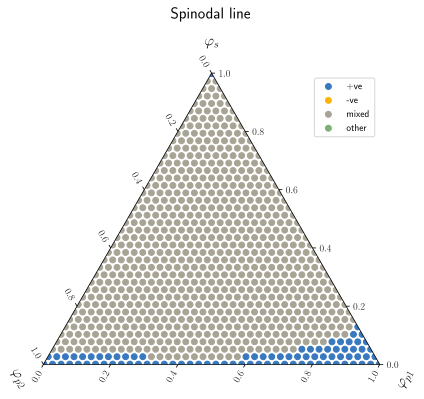

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='ternary',rotation=-120)
ax = plotlocus(np.asarray(grid),curvature,ax=ax)
fig.suptitle('Spinodal line', fontsize=16)
plt.legend()
plt.tight_layout()
#plt.savefig(fname+'_spinodal.pdf',dpi=500,bbox_inches='tight')
plt.show()

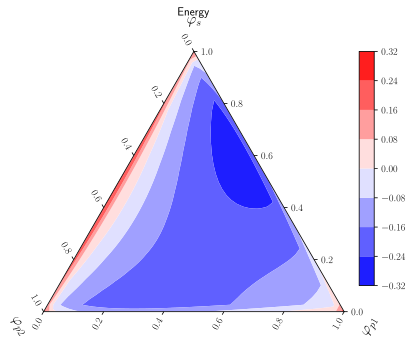

In [14]:
fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.65)
plt.set_cmap('bwr')

ax = fig.add_subplot(1,1,1,projection='ternary',rotation=-120)

ax,cs, cax = contours(grid,energy,mode='contour',ax=ax)
pad_title = 36
ax.set_title("Energy", pad=pad_title)
colorbar = fig.colorbar(cs, cax=cax)

plt.show()

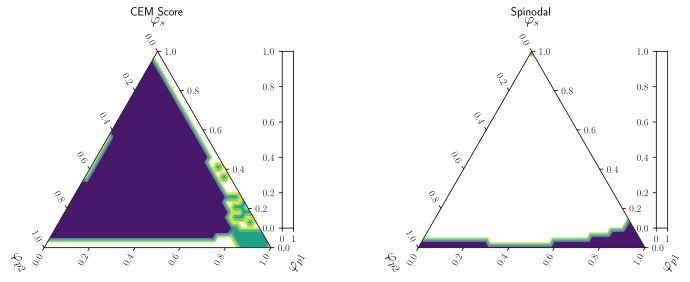

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.65)
plt.set_cmap('viridis')

ax = fig.add_subplot(1,2,1,projection='ternary',rotation=-120)

ax,cs,cax = contours(grid,score,mode='contour',ax=ax,level=[1.5])
pad_title = 36
ax.set_title("CEM Score", pad=pad_title)
#colorbar = fig.colorbar(cs, cax=cax)

ax = fig.add_subplot(1,2,2,projection='ternary',rotation=-120)

ax,cs,cax = contours(grid,curvature,mode='contour',ax=ax,level=[1.00])
pad_title = 36
ax.set_title("Spinodal", pad=pad_title)
#colorbar = fig.colorbar(cs, cax=cax)
plt.show()


In [16]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(points[:,0], points[:,1], points[:,2], marker='o',c='green')
# #ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles = hull.simplices,cmap=plt.cm.Spectral)
# plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


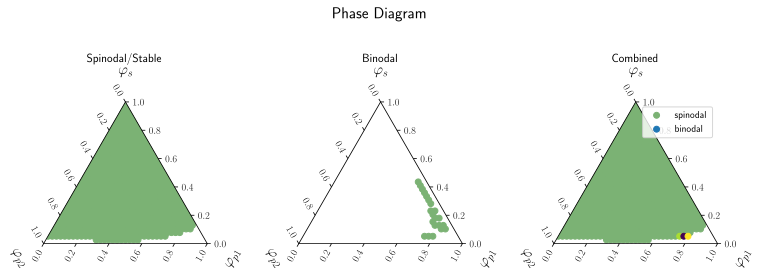

In [17]:
"""
Plot a phase diagram with the following:
score : Binodal points classified using CEM
curvature :  Spinodal points classified using Hessian

"""
from solvers.utils import set_ternlabel

fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.65)

ax = fig.add_subplot(1,3,1,projection='ternary',rotation=-120)
colors = ["faded green", "dusty purple","amber", "greyish"]
colors = sns.xkcd_palette(colors)
t,l,r = grid[:,0],grid[:,1],grid[:,2]

stable_ids = np.where(np.asarray(curvature)==2)
ax.scatter(t[stable_ids], l[stable_ids], r[stable_ids],c=colors[0],label='stable')
ax.set_title('Spinodal/Stable', pad=40)
ax = set_ternlabel(ax)

ax = fig.add_subplot(1,3,2,projection='ternary',rotation=-120)
binodal_ids = np.where(np.asarray(score)>1.00)
refined_binodal_ids = []
for ind in binodal_ids[0]:
    is_binary = np.any(np.round(grid[ind],2)<=0.03)
    if not is_binary:
        refined_binodal_ids.append(ind)

ax.scatter(t[refined_binodal_ids], l[refined_binodal_ids], r[refined_binodal_ids],c=colors[0],label='binodal')
ax.set_title('Binodal',pad=40)
ax = set_ternlabel(ax)

ax = fig.add_subplot(1,3,3,projection='ternary',rotation=-120)
metastable_ids = np.setdiff1d(refined_binodal_ids,stable_ids)
ax.scatter(t[stable_ids], l[stable_ids], r[stable_ids],c=colors[0],label='spinodal')
ax.scatter(t[metastable_ids], l[metastable_ids], r[metastable_ids],c=colors[1],label='binodal')
#ax.plot(t[metastable_ids], l[metastable_ids], r[metastable_ids],c=colors[1],lw=2.0)

ax.legend(loc='upper right')
ax = set_ternlabel(ax)
ax.set_title('Combined',pad=40)

fig.suptitle('Phase Diagram', fontsize=16)
plt.legend()
plt.tight_layout()
#plt.savefig('phasediagram_cem_hessian.png',dpi=500,bbox_inches='tight')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


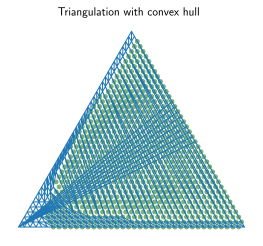

In [18]:
# Plot a convex triangulation in the ternary space
from solvers.helpers import get_ternary_coords
from scipy.spatial import ConvexHull
coords = []
for point in grid:
    coords.append(get_ternary_coords(point))
points = np.concatenate((coords,np.asarray(energy).reshape(-1,1)),axis=1)
hull = ConvexHull(points)
coords = np.asarray(coords)
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(coords[:,0], coords[:,1], triangles= hull.simplices, lw=1)
ax1.scatter(coords[stable_ids,0],coords[stable_ids,1],c =colors[0],s=15 )
ax1.set_title('Triangulation with convex hull')
plt.axis('off')
#plt.savefig('../figures/triangulation_FHPaper.png',bbox_inches='tight',dpi=300)
plt.show()